## Dataset overview ##

<p style="color:blue;"> First lets Import the required libraries </p>

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

<p style="color:blue;"> After importing the required libraries we will now import the dataset </p>

In [183]:
# Read csv file
df_mood_smartphone = pd.read_csv("dataset_mood_smartphone.csv")  

# Remove the 'Unnamed: 0' column
df_mood_smartphone.drop('Unnamed: 0', axis=1, inplace=True)

df_mood_smartphone.head(10) # Glance of the dataset

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,AS14.01,2014-02-27 09:00:00.000,mood,6.0
5,AS14.01,2014-02-27 12:00:00.000,mood,6.0
6,AS14.01,2014-02-27 15:00:00.000,mood,7.0
7,AS14.01,2014-03-21 09:00:00.000,mood,6.0
8,AS14.01,2014-03-21 11:00:00.000,mood,6.0
9,AS14.01,2014-03-21 15:00:00.000,mood,7.0


<p style="color:blue;"> Lets now describe the data </p>

##### The dataset has the following columns below:
1. id  &ensp; - &ensp;  unique identifier of user.
2. time  &ensp; - &ensp;  Date with time record was made.
3. variable  &ensp; - &ensp;  age in years.
- mood &ensp; - &ensp; The mood scored by the user on a scale of 1-10
- circumplex.arousal &ensp; - &ensp; The arousal scored by the user, on a scale between -2 to 2
- circumplex.valence &ensp; - &ensp; The valence scored by the user, on a scale between -2 to 2
- activity &ensp; - &ensp; Activity score of the user (number between 0 and 1)
- screen &ensp; - &ensp; Duration of screen activity (time)
- call &ensp; - &ensp; Call made (indicated by a 1)
- sms &ensp; - &ensp; SMS sent (indicated by a 1)
- appCat.builtin &ensp; - &ensp; Duration of usage of builtin apps (time)
- appCat.communication &ensp; - &ensp; Duration of usage of communication apps (time)
- appCat.entertainment &ensp; - &ensp; Duration of usage of entertainment apps (time)
- appCat.finance &ensp; - &ensp; Duration of usage of finance apps (time)
- appCat.game &ensp; - &ensp; Duration of usage of game apps (time)
- appCat.office &ensp; - &ensp; Duration of usage of office apps (time)
- appCat.other &ensp; - &ensp; Duration of usage of other apps (time)
- appCat.social &ensp; - &ensp; Duration of usage of social apps (time)
- appCat.travel &ensp; - &ensp; Duration of usage of travel apps (time)
- appCat.unknown &ensp; - &ensp; Duration of usage of unknown apps (time)
- appCat.utilities &ensp; - &ensp; Duration of usage of utilities apps (time)
- appCat.weather &ensp; - &ensp; Duration of usage of weather apps (time)
4. value  &ensp; - &ensp;  a number associated to variable.

## EXPLORATORY DATA ANALYSIS (EDA) ## 

In [184]:
# Check the number of records and attributes
num_records, num_attributes = df_mood_smartphone.shape
print(f"Number of records: {num_records}")
print(f"Number of attributes: {num_attributes}")

Number of records: 376912
Number of attributes: 4


In [185]:
#tstatistical information about the data
print(df_mood_smartphone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        376912 non-null  object 
 1   time      376912 non-null  object 
 2   variable  376912 non-null  object 
 3   value     376710 non-null  float64
dtypes: float64(1), object(3)
memory usage: 11.5+ MB
None


In [186]:
# Find the minimum and maximum values for each column
min_values = df_mood_smartphone.min()
max_values = df_mood_smartphone.max()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
id                          AS14.01
time        2014-02-17 07:00:52.197
variable                   activity
value                    -82798.871
dtype: object

Maximum values:
id                          AS14.33
time        2014-06-09 00:00:00.000
variable                        sms
value                     33960.246
dtype: object


In [187]:
# Summary statistics
print(df_mood_smartphone.describe())

               value
count  376710.000000
mean       40.665313
std       273.726007
min    -82798.871000
25%         2.025000
50%         7.029000
75%        29.356000
max     33960.246000


In [188]:
# Check for missing values
print(df_mood_smartphone.isnull().sum())

id            0
time          0
variable      0
value       202
dtype: int64


In [189]:
# Get unique values for the 'variable' column
unique_variables = df_mood_smartphone['variable'].unique()

# Print the unique values
print(unique_variables)


['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [190]:
# lets now filter the DataFrame to select rows for a specific ID
rows_for_id = df_mood_smartphone[(df_mood_smartphone['id'] == 'AS14.01') & (df_mood_smartphone['variable'] == 'mood')]

# Print the filtered rows
print(rows_for_id.head())


        id                     time variable  value
0  AS14.01  2014-02-26 13:00:00.000     mood    6.0
1  AS14.01  2014-02-26 15:00:00.000     mood    6.0
2  AS14.01  2014-02-26 18:00:00.000     mood    6.0
3  AS14.01  2014-02-26 21:00:00.000     mood    7.0
4  AS14.01  2014-02-27 09:00:00.000     mood    6.0


In [191]:
#Lets check the rows with variable mood

# fetching all rows with variable mood
mood_filtered  = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood']

# all the userid list
ids_list = mood_filtered ['id'].tolist()
ids = set()

# Iterate through each dictionary in the list
for item in ids_list:
    # Add the ID to the set
    ids.add(item)

# Convert the set to a list
print(sorted(ids))

['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07', 'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15', 'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24', 'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33']


## DATA CLEANING ## 

Lets use drop the rows with missing values because they are not alot

In [192]:
# Drop missing values
df_mood_smartphone.dropna(inplace=True)

In [193]:
print(df_mood_smartphone.isnull().sum())

id          0
time        0
variable    0
value       0
dtype: int64


## DATA VISUALISATION ##

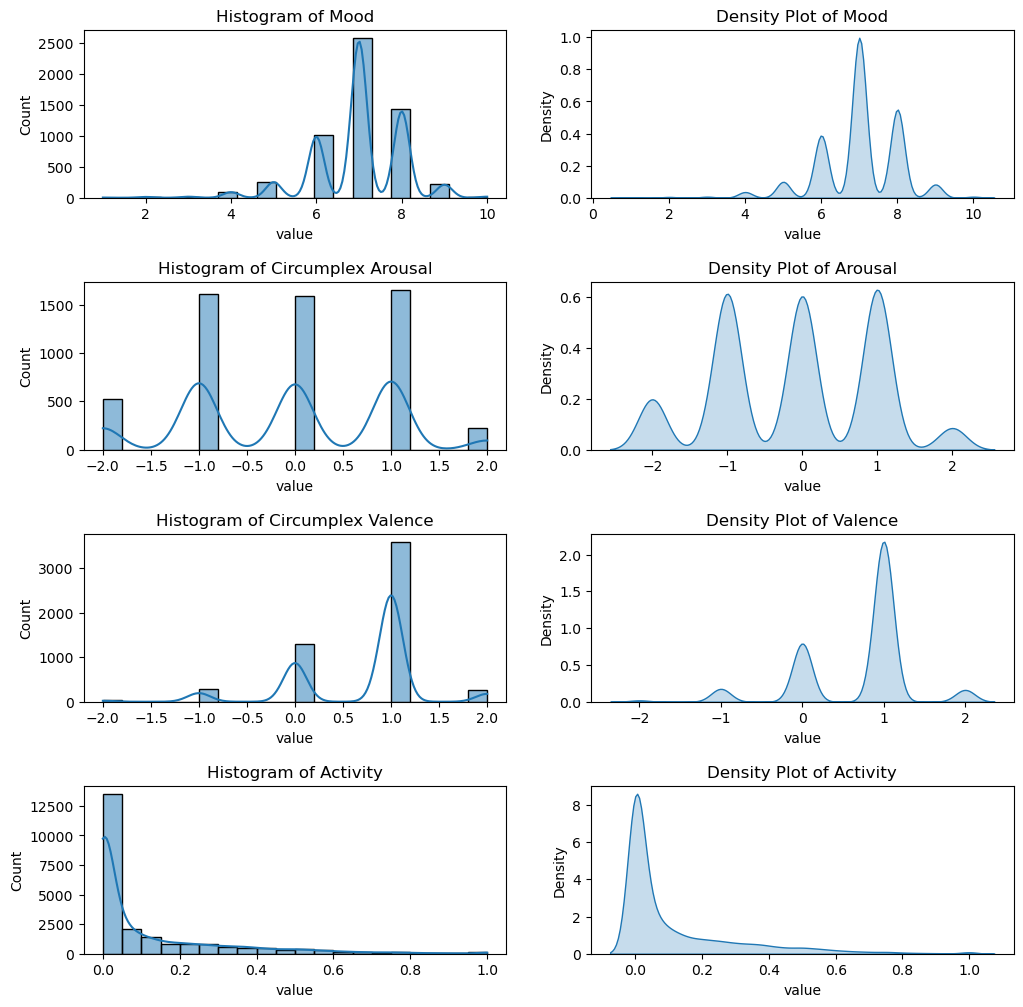

In [194]:
arousal_filtered = df_mood_smartphone[df_mood_smartphone['variable'] == 'circumplex.arousal']
valence_filtered = df_mood_smartphone[df_mood_smartphone['variable'] == 'circumplex.valence']
activity_filtered = df_mood_smartphone[df_mood_smartphone['variable'] == 'activity']

# Set up the figure and axes
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Plot histograms for 'mood', 'circumplex.arousal', and 'circumplex.valence' and 'activity'
sns.histplot(data=mood_filtered, x='value', bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histogram of Mood')

sns.histplot(data=arousal_filtered, x='value', bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram of Circumplex Arousal')

sns.histplot(data=valence_filtered, x='value', bins=20, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Histogram of Circumplex Valence')

sns.histplot(data=activity_filtered, x='value', bins=20, kde=True, ax=axs[3, 0])
axs[3, 0].set_title('Histogram of Activity')

# Plot density plots for 'mood', 'circumplex.arousal', and 'circumplex.valence' and 'activity'
sns.kdeplot(data=mood_filtered, x='value', fill=True, ax=axs[0, 1])
axs[0, 1].set_title('Density Plot of Mood')

sns.kdeplot(data=arousal_filtered, x='value', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('Density Plot of Arousal')

sns.kdeplot(data=valence_filtered, x='value', fill=True, ax=axs[2, 1])
axs[2, 1].set_title('Density Plot of Valence')

sns.kdeplot(data=activity_filtered, x='value', fill=True, ax=axs[3, 1])
axs[3, 1].set_title('Density Plot of Activity')

plt.subplots_adjust(hspace=0.5)

plt.show()

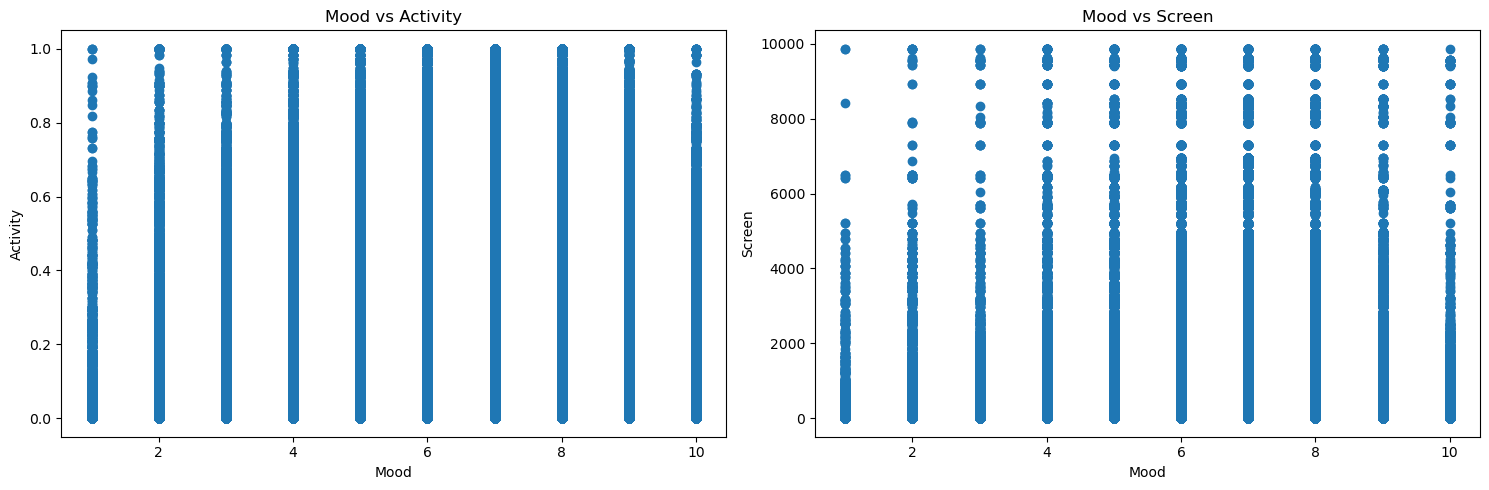

In [195]:
screen_usage = df_mood_smartphone[df_mood_smartphone['variable'] == 'screen']

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

merged_mood_activity = mood_filtered.merge(activity_filtered, on='id')
merged_mood_screen = mood_filtered.merge(screen_usage, on='id')

# Scatter plot for 'mood' vs 'activity'
axs[0].scatter(merged_mood_activity['value_x'], merged_mood_activity['value_y'])
axs[0].set_xlabel('Mood')
axs[0].set_ylabel('Activity')
axs[0].set_title('Mood vs Activity')

# Scatter plot for 'mood' vs 'screen'
axs[1].scatter(merged_mood_screen['value_x'], merged_mood_screen['value_y'])
axs[1].set_xlabel('Mood')
axs[1].set_ylabel('Screen')
axs[1].set_title('Mood vs Screen')

# Scatter plot for 'mood' vs duration of app usage category ('appCat.*')
# axs[2].scatter(mood_filtered['value'], data['appCat.communication'])
# axs[2].set_xlabel('Mood')
# axs[2].set_ylabel('Duration of Communication App Usage')
# axs[2].set_title('Mood vs Duration of Communication App Usage')

# Adjust layout
plt.tight_layout()
plt.show()

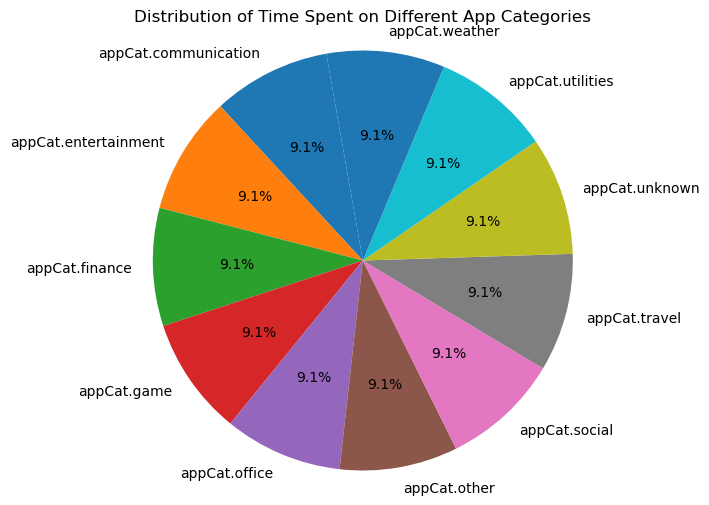

In [196]:
# Extract the time spent on different app categories
app_categories = ['appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 
                  'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']

app_category_times = [df_mood_smartphone['value'].sum() for variable in app_categories]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create pie chart
ax.pie(app_category_times, labels=app_categories, autopct='%1.1f%%', startangle=100)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Set title
ax.set_title('Distribution of Time Spent on Different App Categories')

# Show plot
plt.show()

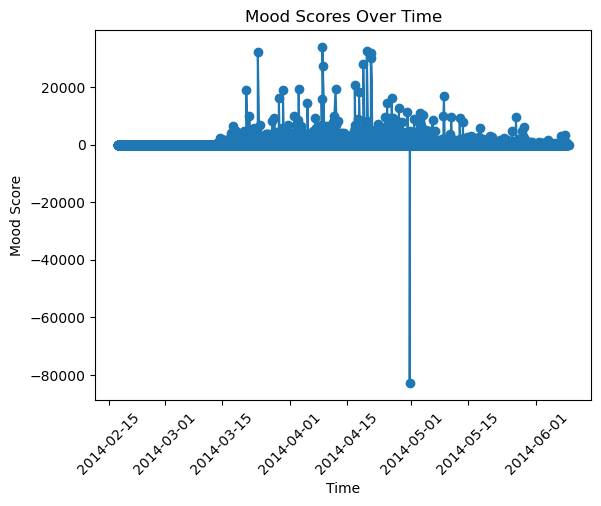

In [197]:
# Convert 'time' column to datetime
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

# Plot mood scores over time
plt.plot(df_mood_smartphone['time'], df_mood_smartphone['value'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Mood Score')
plt.title('Mood Scores Over Time')
plt.xticks(rotation=45)
plt.show()

C:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


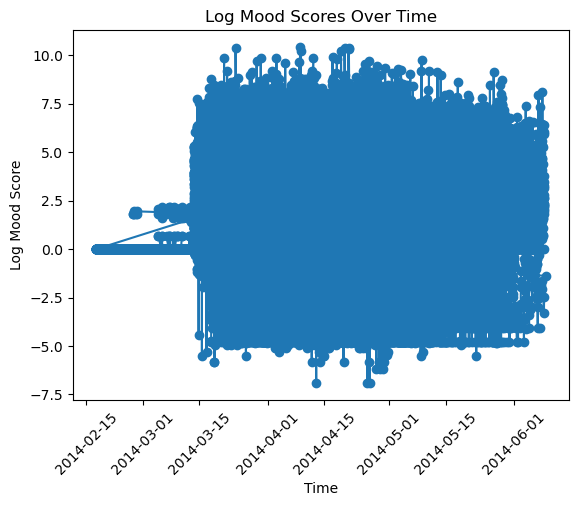

In [198]:
# Apply log transformation to the 'value' column
df_mood_smartphone['value_log'] = np.log(df_mood_smartphone['value'])

# Plot log-transformed mood scores over time
plt.plot(df_mood_smartphone['time'], df_mood_smartphone['value_log'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Log Mood Score')
plt.title('Log Mood Scores Over Time')
plt.xticks(rotation=45)
plt.show()


## FEATURE ENGINEERING(using  last five days as predictor) ## 

In [207]:
# Convert time column to datetime format
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

# Filter data to include only mood values
df_mood = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood'].copy()

# Aggregate data to calculate features for each subject and each day
df_agg = df_mood.groupby(['id', pd.Grouper(key='time', freq='D')])['value'].agg(['mean']).reset_index()
df_agg.rename(columns={'mean': 'avg_mood'}, inplace=True)

# Shift the time column by one day to predict mood of the next day
df_agg['time'] = df_agg['time'] + pd.DateOffset(days=1)

# Merge with the original dataframe to get the mood of the next day
df_merged = pd.merge(df_agg, df_agg[['id', 'time', 'avg_mood']], how='left', left_on=['id', 'time'], right_on=['id', 'time'], suffixes=('', '_next'))

# Shift the avg_mood column by 5 days to get the average mood of the last five days
df_merged['avg_mood_last_5_days'] = df_merged.groupby('id')['avg_mood'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())

# Drop rows where 'avg_mood_last_5_days' is NaN
df_merged.dropna(inplace=True)

## MODEL THE DATA ( AVERAGE last five days as predictor) AND EVALUATION ## 

In [200]:
# Split data into features and target variable
X = df_merged[['avg_mood_last_5_days']]
y = df_merged['avg_mood_next']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.33561656209190593


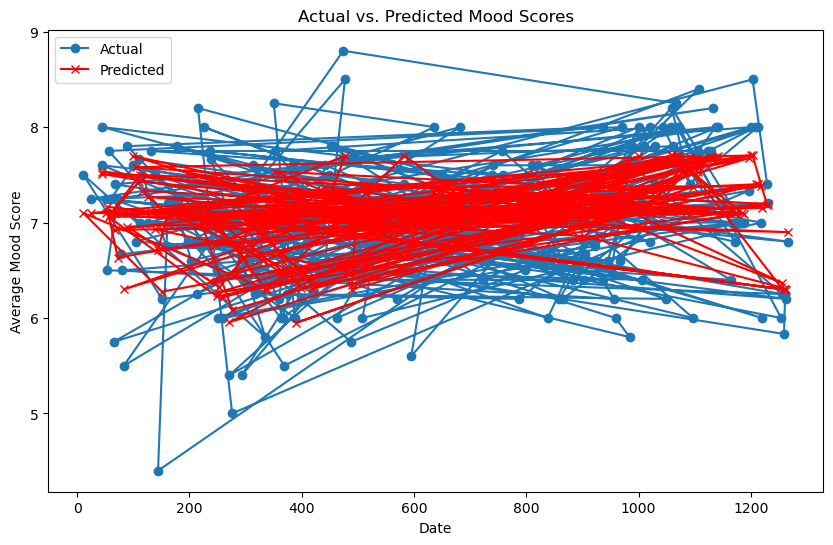

In [201]:
# Set the index of y_test to the datetime values
y_test.index = X_test.index

# Plot actual vs. predicted mood values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Average Mood Score')
plt.title('Actual vs. Predicted Mood Scores')
plt.legend()
plt.show()


## FEATURE ENGINEERING AVERAGE ALL DAYS ## 

In [203]:
# Convert 'time' column to datetime format
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

# Filter data to include only mood values
df_mood = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood'].copy()

# Aggregate data to calculate features for each subject and each day
df_agg = df_mood.groupby(['id', pd.Grouper(key='time', freq='D')])['value'].agg(['mean']).reset_index()
df_agg.rename(columns={'mean': 'avg_mood'}, inplace=True)

# Shift the 'time' column by one day to predict mood of the next day
df_agg['time'] = df_agg['time'] + pd.DateOffset(days=1)

# Merge with the original dataframe to get the mood of the next day
df_merged = pd.merge(df_agg, df_agg[['id', 'time', 'avg_mood']], how='left', left_on=['id', 'time'], right_on=['id', 'time'], suffixes=('', '_next'))

## MODEL THE DATA ALL DAYS AND EVALUATION ## 

In [204]:
# Split data into features and target variable
X = df_merged[['avg_mood']]
y = df_merged['avg_mood_next']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.01234705547897615


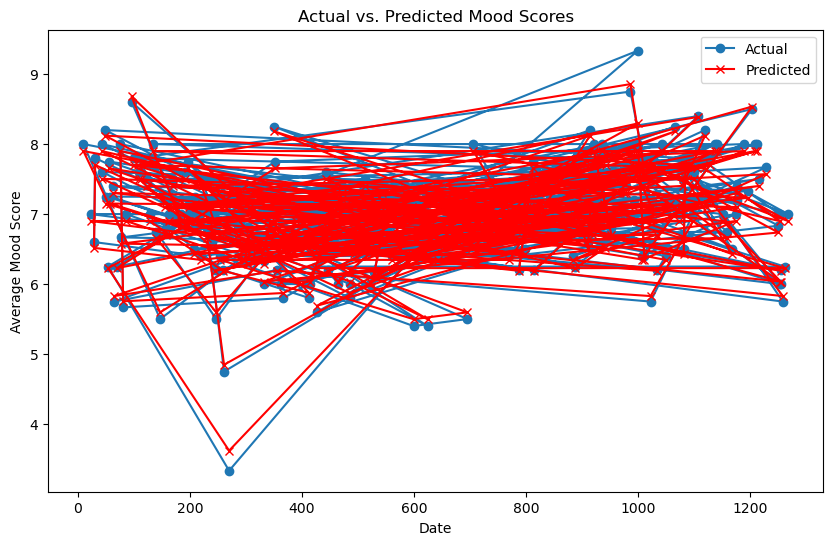

In [205]:
# Set the index of y_test to the datetime values
y_test.index = X_test.index

# Plot actual vs. predicted mood values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Average Mood Score')
plt.title('Actual vs. Predicted Mood Scores')
plt.legend()
plt.show()


## Grid Search (Hyper Parameter Tuning) ##

In [146]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Instantiate the SVR model
svm_model = SVR()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  14.5s
[CV] END ........................C=0.1, gamma=1

## Lets now use the best hyperparameters and both models

## MODEL THE DATA (using  last five days as predictor) AND EVALUATION 2 ## 

In [208]:
# Split data into features and target variable
X = df_merged[['avg_mood_last_5_days']]
y = df_merged['avg_mood_next']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svm_model = SVR(C=100, gamma=0.001, kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.33743802105408865


## MODEL THE DATA AND EVALUATION 2 ## 

In [209]:
# Split data into features and target variable
X = df_merged[['avg_mood']]
y = df_merged['avg_mood_next']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svm_model = SVR(C=100, gamma=0.001, kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.0006804637542857285


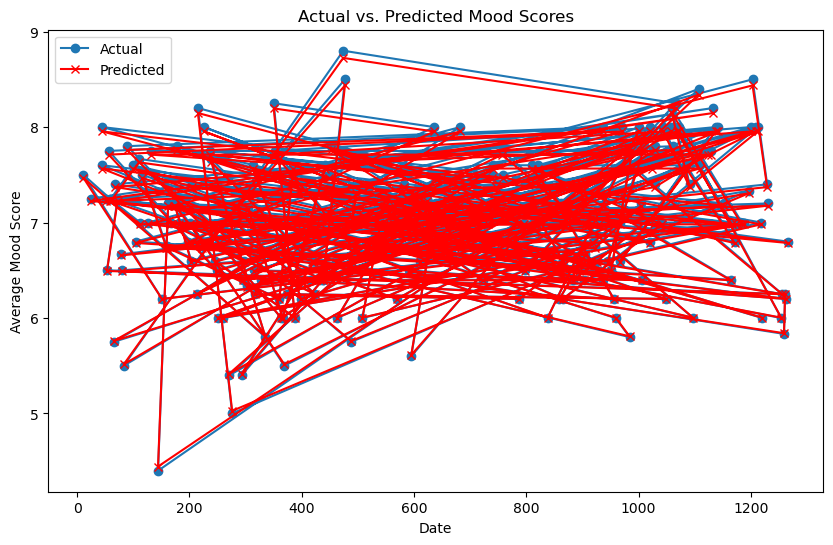

In [210]:
# Set the index of y_test to the datetime values
y_test.index = X_test.index

# Plot actual vs. predicted mood values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Average Mood Score')
plt.title('Actual vs. Predicted Mood Scores')
plt.legend()
plt.show()


## CONCLUSION ## 

Before hyperparameter tuning, the model using only the average of last five days as predictors had a relatively higher MSE of 0.3356 compared to the model utilizing all days, which had a lower MSE of 0.0123. This indicated that the model incorporating less historical data initially performed worse in predicting mood scores for the next day compared to the model using all days. However, after hyperparameter tuning, there was a significant improvement in the MSE of the model using all days, reducing it to 0.00068. This substantial enhancement indicated that the fine-tuning of hyperparameters led to a much more accurate prediction model for the model utilizing all days. Conversely, the model using the last five days also experienced a slight decrement in MSE, its relative performance remained lower compared to the model using all days. Overall, we can say that the hyperparameter tuning process resulted in notable advancements in predictive accuracy, highlighting the importance of parameter optimization in machine learning models.